In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


# Veri setinin Okunması ve Düzenlenmesi

In [3]:
df =  pd.read_csv("USArrests.csv").copy()
df.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


- Veri setindeki eyalet isimlerini index olarak belirliyeceğiz ve yukarısındaki başlığı kaldıracağız 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
Unnamed: 0    50 non-null object
Murder        50 non-null float64
Assault       50 non-null int64
UrbanPop      50 non-null int64
Rape          50 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
df.index = df.iloc[:,0]
df = df.iloc[: , 1:]
df.head(3)

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


In [7]:
del df.index.name
df.head(3)
#  index ismini başarı ile kaldırdık 


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


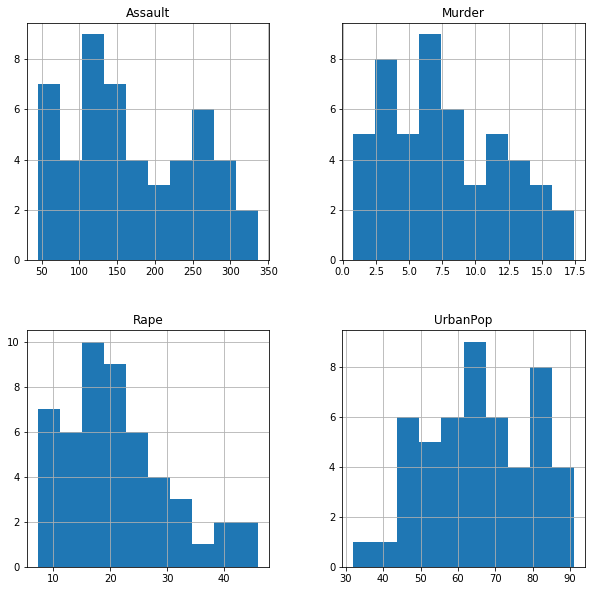

In [8]:
df.hist(figsize = (10 ,10));
# dağılımlar normal dağılımların oluşum sebepleri incelenmelidir

# Model kurma 

In [9]:
from scipy.cluster.hierarchy import linkage

In [13]:
hc_complete = linkage( df ,"complete" )
hc_average = linkage( df ,"average" )
hc_single = linkage(df ,"single")

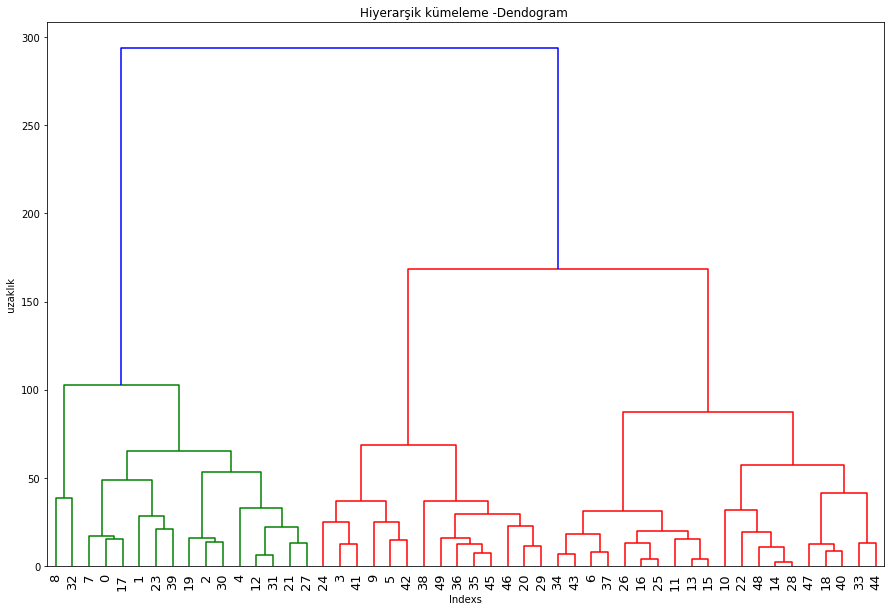

In [25]:
from scipy.cluster.hierarchy import dendrogram

plt.figure( figsize =(15 ,10 ) )
plt.title("Hiyerarşik kümeleme -Dendogram ")
plt.xlabel("Indexs")
plt.ylabel(" uzaklık ")
dendrogram(
    hc_complete,
    leaf_font_size = 13 # yazı font büyüklüğü 
);

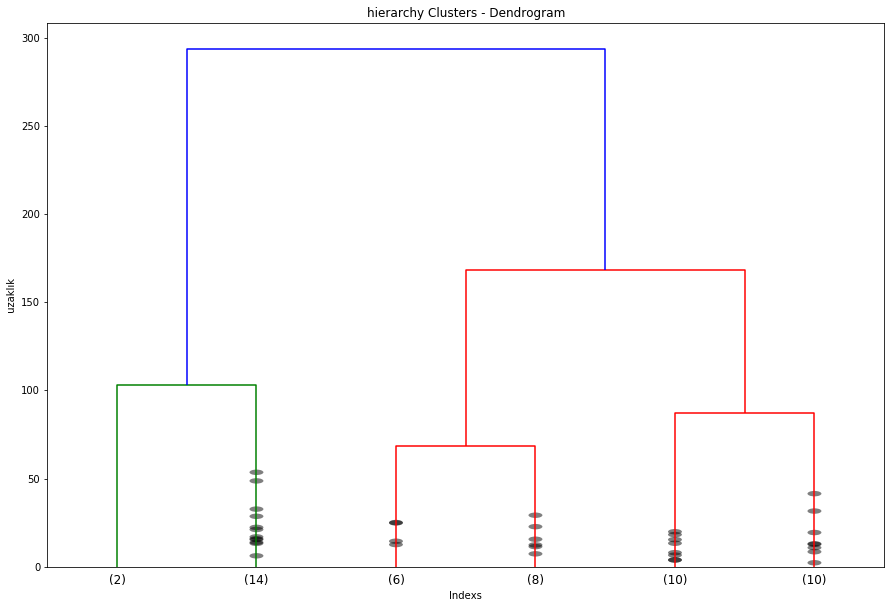

In [39]:
from scipy.cluster.hierarchy import dendrogram 

plt.figure( figsize=(15, 10 ))
plt.title("hierarchy Clusters - Dendrogram")
plt.xlabel("Indexs")
plt.ylabel(" uzaklık ")
dendrogram(
    hc_complete,
    truncate_mode  = "lastp", #kümeleme tipi
    p = 6, # küme sayısı 
    show_contracted = True #değer sayısı gösterme açık
);

# Model kurma 

In [41]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering( # birleştirici kümeleme işlemi 
            
        n_clusters = 4, #küme sayısı 
        affinity =  "euclidean", # #uzaklık metriği 
        linkage = "ward" #metod (birleştirme metodu)
    
    )

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [42]:
df["class_no"] = cluster.fit_predict(df)

In [43]:
df

,Murder,Assault,UrbanPop,Rape,class_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,2
